In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("G:/ocrug/10nov_mod.csv")

In [4]:
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
df = df.drop('Year', axis = 1)

In [6]:
df['Class'].value_counts()

yes    31938
no     31938
Name: Class, dtype: int64

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Class'],
      dtype='object')

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

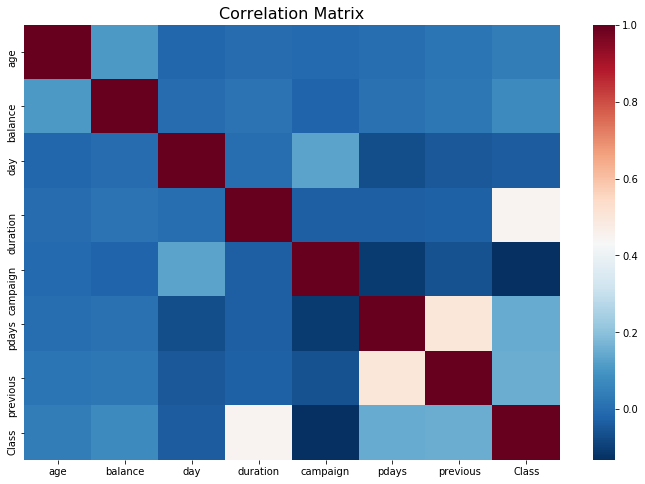

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['Class'] = LabelEncoder().fit_transform(df['Class'])


# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()

sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [11]:
#Modelling

In [12]:
# Separate the labels and the features.
train_data = df # Make a copy of the stratified training set.

train_data['Class'].value_counts()

1    31938
0    31938
Name: Class, dtype: int64

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63876 entries, 0 to 63875
Data columns (total 17 columns):
age          63876 non-null int64
job          63876 non-null object
marital      63876 non-null object
education    63876 non-null object
default      63876 non-null object
balance      63876 non-null int64
housing      63876 non-null object
loan         63876 non-null object
contact      63876 non-null object
day          63876 non-null int64
month        63876 non-null object
duration     63876 non-null int64
campaign     63876 non-null int64
pdays        63876 non-null int64
previous     63876 non-null int64
poutcome     63876 non-null object
Class        63876 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 8.0+ MB


In [14]:
#categorical encoding
obj_df = train_data.select_dtypes(include=['object']).copy()
cat = pd.get_dummies(obj_df)

In [15]:
cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [16]:
num_df = train_data[["age", "balance", "day", "campaign", "pdays", "previous","duration"]]
num_df.head()

,age,balance,day,campaign,pdays,previous,duration
0,68,3588,3,1,-1,0,119
1,40,0,30,1,-1,0,138
2,49,1644,25,4,-1,0,238
3,56,478,5,1,-1,0,97
4,27,1393,31,1,271,1,382


In [17]:
#standard scaling

from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(num_df.values)
scaled_features

array([[ 2.25415431,  0.65063043, -1.49583043, ..., -0.48887555,
        -0.37906978, -0.74204998],
       [-0.1025992 , -0.4906889 ,  1.70911273, ..., -0.48887555,
        -0.37906978, -0.68808414],
       [ 0.65492871,  0.03225675,  1.11560474, ..., -0.48887555,
        -0.37906978, -0.40405339],
       ...,
       [ 0.31824964, -0.34881922, -1.13972564, ..., -0.48887555,
        -0.37906978, -0.2165931 ],
       [-0.1025992 , -0.21776471,  1.23430633, ..., -0.48887555,
        -0.37906978, -0.50630446],
       [ 0.90743802, -0.46078812,  1.70911273, ..., -0.48887555,
        -0.37906978, -0.38701155]])

In [18]:
scaled_features_df = pd.DataFrame(scaled_features, index=num_df.index, columns=num_df.columns)
scaled_features_df.head()

,age,balance,day,campaign,pdays,previous,duration
0,2.254154,0.650630,-1.495830,-0.556716,-0.488876,-0.379070,-0.742050
1,-0.102599,-0.490689,1.709113,-0.556716,-0.488876,-0.379070,-0.688084
2,0.654929,0.032257,1.115605,0.555254,-0.488876,-0.379070,-0.404053
3,1.244117,-0.338640,-1.258427,-0.556716,-0.488876,-0.379070,-0.804537
4,-1.196806,-0.047585,1.827814,-0.556716,1.991985,0.077874,0.004951


In [19]:
#join
X_train = pd.concat([scaled_features_df, cat], axis = 1)
X_train.head()

,age,balance,day,campaign,pdays,previous,duration,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2.254154,0.650630,-1.495830,-0.556716,-0.488876,-0.379070,-0.742050,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.102599,-0.490689,1.709113,-0.556716,-0.488876,-0.379070,-0.688084,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.654929,0.032257,1.115605,0.555254,-0.488876,-0.379070,-0.404053,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.244117,-0.338640,-1.258427,-0.556716,-0.488876,-0.379070,-0.804537,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-1.196806,-0.047585,1.827814,-0.556716,1.991985,0.077874,0.004951,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [20]:
y_train = train_data['Class']
#y_test = test_data['Class']
y_train.shape

(63876,)

In [21]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
#y_test = encode.fit_transform(y_test)
y_train_yes = (y_train == 1)
y_train
y_train_yes

array([False, False, False, ...,  True,  True,  True])

In [22]:
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [23]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [24]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


trained Logistic Regression in 0.85 s


C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


trained Nearest Neighbors in 3.12 s


C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


trained Linear SVM in 277.98 s


C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


trained Gradient Boosting Classifier in 19.68 s


C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


trained Decision Tree in 1.28 s


C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


trained Random Forest in 2.94 s


C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


trained Neural Net in 24.34 s


C:\Users\Sushrut\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


trained Naive Bayes in 0.15 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       1.279824
5                 Random Forest     0.999875       2.936803
1             Nearest Neighbors     0.950216       3.123441
2                    Linear SVM     0.870452     277.984816
3  Gradient Boosting Classifier     0.861388      19.679758
6                    Neural Net     0.857114      24.341550
0           Logistic Regression     0.833318       0.852069
7                   Naive Bayes     0.717453       0.148274


In [25]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

C:\Users\Sushrut\Anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sushrut\Anaconda3.7\lib\site-packages\sklearn\svm\

In [125]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Class', 'interaction'],
      dtype='object')

In [26]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
5,Rand FC,0.966983
3,Dec Tree,0.956963
2,KNN,0.908135
1,SVC,0.865004
4,Grad B CLF,0.860574
6,Neural Classifier,0.856065
7,Naives Bayes,0.856065
0,Logistic Reg.,0.832895


In [27]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)

In [28]:
from sklearn.metrics import accuracy_score
grad_clf.fit(X_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.86


In [29]:
#Testing

In [31]:
#Validation

In [29]:
test = pd.read_csv("G:/ocrug/10nov_test.csv")

In [31]:
test['y'].value_counts()

no     7984
yes    1058
Name: y, dtype: int64

In [32]:
test_data = test[['age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome']]



In [33]:
y_test = test['y']
y_test = encode.fit_transform(y_test)

In [34]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [35]:
#Test data

#categorical encoding
test_obj_df = test_data.select_dtypes(include=['object']).copy()
test_cat = pd.get_dummies(test_obj_df)

test_num_df = test_data[["age", "balance", "day", "campaign", "pdays", "previous","duration"]]

#standard scaling
from sklearn.preprocessing import StandardScaler
test_scaled_features = StandardScaler().fit_transform(test_num_df.values)

test_scaled_features_df = pd.DataFrame(test_scaled_features, index=test_num_df.index, columns=test_num_df.columns)
test_scaled_features_df.head()

#join
X_test = pd.concat([test_scaled_features_df, test_cat], axis = 1)
X_test.head()

,age,balance,day,campaign,pdays,previous,duration,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.267581,-0.427633,-1.290597,-0.583051,-0.41141,-0.176948,-0.417160,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.547991,0.051008,-1.290597,-0.583051,-0.41141,-0.176948,-0.649905,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,1.576161,-0.397819,-1.290597,-0.583051,-0.41141,-0.176948,-0.815588,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,-0.012829,-0.349534,-1.290597,-0.583051,-0.41141,-0.176948,-0.137078,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.921871,-0.362820,-1.290597,-0.583051,-0.41141,-0.176948,0.379695,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [38]:
y_test_pred = rand_clf.predict(X_test)
y_test_pred

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [40]:
#accuracy_score(y_test, y_test_pred)

In [59]:
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
accuracy_score(y_test, predict)

0.8749170537491705

In [60]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()

In [61]:
tn, fp, fn, tp

(7284, 700, 431, 627)

In [62]:
precision = tp/(tp + fp)
precision

0.4724943481537302

In [63]:
no_correct = tn/(tn + fn)
no_correct

0.9441348023331173

In [47]:
total_acc = (tp + tn)/(tp + tn + fp + fn)
total_acc

0.873811103738111

In [51]:
#decision tree
#tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
dt_predict = tree_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predict)

In [52]:
tn, fp, fn, tp = confusion_matrix(y_test, dt_predict).ravel()

In [53]:
dt_precision = tp/(tp + fp)
dt_precision

0.33376792698826596

In [54]:
(tp + tn)/(tp + tn + fp + fn)

0.8265870382658704

In [55]:
#gradient boosting
grad_clf.fit(X_train, y_train)
grad_predict = grad_clf.predict(X_test)
grad_acc = accuracy_score(y_test, grad_predict)

In [56]:
tn, fp, fn, tp = confusion_matrix(y_test, grad_predict).ravel()

In [58]:
grad_precision = tp/(tp + fp)
print(dt_precision)

grad_correctNo = tn/(tn + fn)
print(grad_correctNo)

print((tp + tn)/(tp + tn + fp + fn))

0.33376792698826596
0.9927614911328266
0.7193098871930989


In [103]:
#all models

precision = []
npv = []
model_name = []
total_accuracy = []

#gradient boosting
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
log_reg = accuracy_score(y_test, log_reg_predict)
tn, fp, fn, tp = confusion_matrix(y_test, log_reg_predict).ravel()

precision = tp/(tp + fp)
print(precision)
npv = tn/(tn + fn)
print(npv)
acc = (tp + tn)/(tp + tn + fp + fn)
print(acc)

C:\Users\Sushrut\Anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.3209549071618037
0.9850647195486226
0.7635478876354789


In [112]:
rand_scores = cross_val_predict(rand_clf, X_train, y_train, cv=3, method="predict_proba")
rand_scores = rand_scores[:,1]
#neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
#naives_y_scores = cross_val_predict(nav_clf, X_train, y_train, cv=3, method="predict_proba")


In [113]:
print('Random Forest Classifier Score: ', roc_auc_score(y_train, rand_scores))

Random Forest Classifier Score:  0.999128954629167


In [119]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#grd_fpr, grd_tpr, thresold = roc_curve(y_test, log_reg_predict)

print('Random Forest Score: ', roc_auc_score(y_test, rand_predict))
print('Decision Tree Score: ', roc_auc_score(y_test, tree_predict))
print('Logistic Regression Score: ', roc_auc_score(y_test, log_reg_predict))
print('KNN Score: ', roc_auc_score(y_test, knn_predict))
print('SVC Score: ', roc_auc_score(y_test, svc_predict))
print('Grad Boosting Score: ', roc_auc_score(y_test, grad_predict))
print('Neural Net Score: ', roc_auc_score(y_test, neural_predict))
print('Naive Bayes Score: ', roc_auc_score(y_test, nav_predict))

Random Forest Score:  0.7544691225551292
Decision Tree Score:  0.6760784091813116
Logistic Regression Score:  0.8292104056885036
KNN Score:  0.7963476575078322
SVC Score:  0.8379008726337362
Grad Boosting Score:  0.8243111932750189
Neural Net Score:  0.8383102452542135
Naive Bayes Score:  0.7612890004962667


In [162]:
rand_predict_p = rand_clf.predict_proba(X_test)
rand_predict_p = rand_predict_p[:,1]

neural_predict_p = neural_clf.predict_proba(X_test)
neural_predict_p = neural_predict_p[:,1]

nav_predict_p = nav_clf.predict_proba(X_test)
nav_predict_p = nav_predict_p[:,1]

knn_predict_p = knn_clf.predict_proba(X_test)
knn_predict_p = knn_predict_p[:,1]



In [166]:
svc_predict_p = svc_clf.decision_function(X_test)
#svc_predict_p = svc_predict_p[:,1]

IndexError: too many indices for array

In [170]:
grad_predict_p = grad_clf.predict_proba(X_test)
grad_predict_p = grad_predict_p[:,1]

In [180]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_p  =log_reg.predict(X_test)

C:\Users\Sushrut\Anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [181]:
from sklearn.metrics import roc_curve

rand_fpr, rand_tpr, thresold = roc_curve(y_test, rand_predict_p)
neu_fpr, neu_tpr, threshold = roc_curve(y_test, neural_predict_p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, nav_predict_p)
knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_predict_p)
svc_fpr, svc_tpr, threshold = roc_curve(y_test, svc_predict_p)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, grad_predict_p)
log_fpr, log_tpr, threshold = roc_curve(y_test, log_reg_p)
#nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

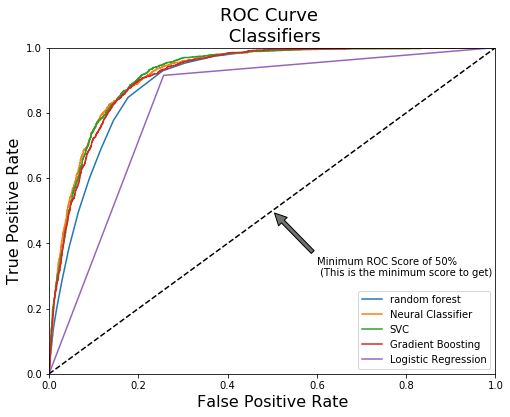

In [184]:
def graph_roc_curve_multiple(rand_fpr, rand_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(neu_fpr, neu_tpr, label='Neural Classifier')
    #plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    #plt.plot(knn_fpr, knn_tpr, label='KNN')
    plt.plot(svc_fpr, svc_tpr, label='SVC')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    #plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 80.33%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, neu_fpr, neu_tpr,tree_fpr, tree_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr)
plt.show()

In [185]:
import scikitplot as skplt
#nb = GaussianNB()
#nb = nb.fit(X_train, y_train)
#y_probas = nb.predict_proba(X_test)
#skplt.metrics.plot_roc(y_test, rand_predict_p)

#plt.show()

In [187]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [188]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 23.6min


KeyboardInterrupt: 